In [1]:
from __future__         import division
import matplotlib.pyplot as plt
import numpy             as np
import array
import math
import struct

%matplotlib inline

def read_mnist(images_file, labels_file): 
    f1 = open(labels_file, 'rb')
    magic_number, size = struct.unpack(">II", f1.read(8))
    labels = array.array("b", f1.read())
    f1.close()
    
    f2 = open(images_file, 'rb')
    magic_number, size, rows, cols = struct.unpack(">IIII", f2.read(16))
    raw_images = array.array("B", f2.read())
    f2.close()

    N = len(labels)
    images = np.zeros((N, rows*cols), dtype=np.uint8)
    for i in range(N):
        images[i] = np.array(raw_images[ i*rows*cols : (i+1)*rows*cols ])

    return images, labels

exp_fn = np.vectorize(math.exp)

def softmax_regression2(X, T, learning_rate=0.00000000001, threshold = 1):
    weights = np.zeros((len(X[0]), Y))
        
def softmax_regression_gradient_descent(X, T, learning_rate=0.00000000001, threshold = 1):
    weights = [np.zeros(len(X[0]))] * 10
    losses = []
    accuracy = []
    while True:
        loss = 0
        A = np.array([exp_fn(np.dot(X, weights[i])) for i in range(10)])
        Y = A
        for n in range(len(X)):
            sum1 = 0
            for i in range(10):
                sum1 += A[i][n]
            
            for i in range(10):
                Y[i][n] = Y[i][n]/sum1
                
        for i in range(10):
            weights[i] = weights[i] + learning_rate * np.dot(X.transpose(), T[i]-Y[i])
        
        for n in range(len(X)):
            for i in range(10):
                loss += T[i][n] * math.log(Y[i][n])
        losses.append(loss)
        
        # Report the overall test accuracy.
        error_count = 0
        for n in range(len(X)):
            probs = Y[:,n]
            predicted_digit = probs.argmax()
            if predicted_digit != labels_train[n]:
                error_count += 1
        accuracy.append(100 - error_count * 100/ len(X))
        
        # Loss chance is less than 0.1% then stop.
        if len(losses) > 2 and math.fabs((losses[-1] - losses[-2])* 100 / losses[-2]) <= 0.1:
            break

    return weights, accuracy

In [2]:
# Read Training data.
TRAIN_IMAGES  = "C:\\Users\\oop\\Desktop\\Winter 2016\\train-images.idx3-ubyte"
TRAIN_LABELS  = "C:\\Users\\oop\\Desktop\\Winter 2016\\train-labels.idx1-ubyte"
images_train, labels_train = read_mnist(TRAIN_IMAGES, TRAIN_LABELS)
images_train, labels_train = images_train[:20000], labels_train[:20000]

# Read Test data.
TEST_IMAGES = "C:\\Users\\oop\\Desktop\\Winter 2016\\t10k-images.idx3-ubyte"
TEST_LABELS  = "C:\\Users\\oop\\Desktop\\Winter 2016\\t10k-labels.idx1-ubyte"
images_test, labels_test = read_mnist(TEST_IMAGES, TEST_LABELS)
images_test, labels_test = images_test[:2000], labels_test[:2000]

In [3]:
def train():
    T = np.array([np.array([1 if label == i else 0 for label in labels_train]) 
                  for i in range(10)])
    X = np.array([np.insert(x, 0, 1) for x in images_train])
    weights, accuracy = softmax_regression_gradient_descent(X, T)
    plt.plot(range(1, len(accuracy)+1), accuracy)
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.show()
    return weights

In [4]:
def test():
    weights = train()
    X = np.array([np.insert(x, 0, 1) for x in images_test])
    A = np.array([exp_fn(np.dot(X, weights[i])) 
                  for i in range(10)])
    Y = A
    for n in range(len(X)):
        sum1 = 0
        for i in range(10):
            sum1 += A[i][n]

        for i in range(10):
            Y[i][n] = Y[i][n]/sum1

    # Report the overall test accuracy.
    error_count = 0
    for n in range(len(X)):
        probs = Y[:,n]
        #print probs
        predicted_digit = probs.argmax()
        if predicted_digit != labels_test[n]:
            #print  predicted_digit, labels[n]
            error_count += 1
    print "Overall test accuracy is " + str(100 - error_count * 100/ len(X))

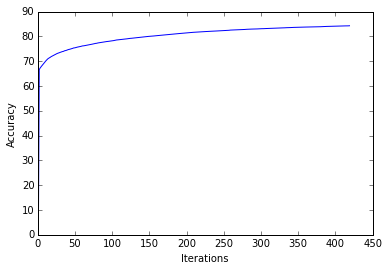

Overall test accuracy is 81.05


In [5]:
test()